# Analysing Crime in Los Angeles

---

## Objectives:

1. Which hour has the highest frequency of crimes?
2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
3. Identify the number of crimes committed against victims of different age groups.

---

## Setup

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import and preview the data
crimes = pd.read_csv('crimes.csv', parse_dates=['Date Rptd', 'DATE OCC'], dtype={'TIME OCC': str})
print(crimes.info())

# Set the style and colors for plots
sns.set_style('darkgrid')
sns.set_palette('flare')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB
None


---

## Which hour has the highest frequency of crimes?

In [22]:
peak_crime_hour: int

crimes['HOUR OCC'] = crimes['TIME OCC'].str.slice(0,2)
peak_crime_hour = crimes['HOUR OCC'].astype(int).mode().values[0]
print(f'{peak_crime_hour} is the hour with the highest frequency of crimes in LA.')

12 is the hour with the highest frequency of crimes in LA.


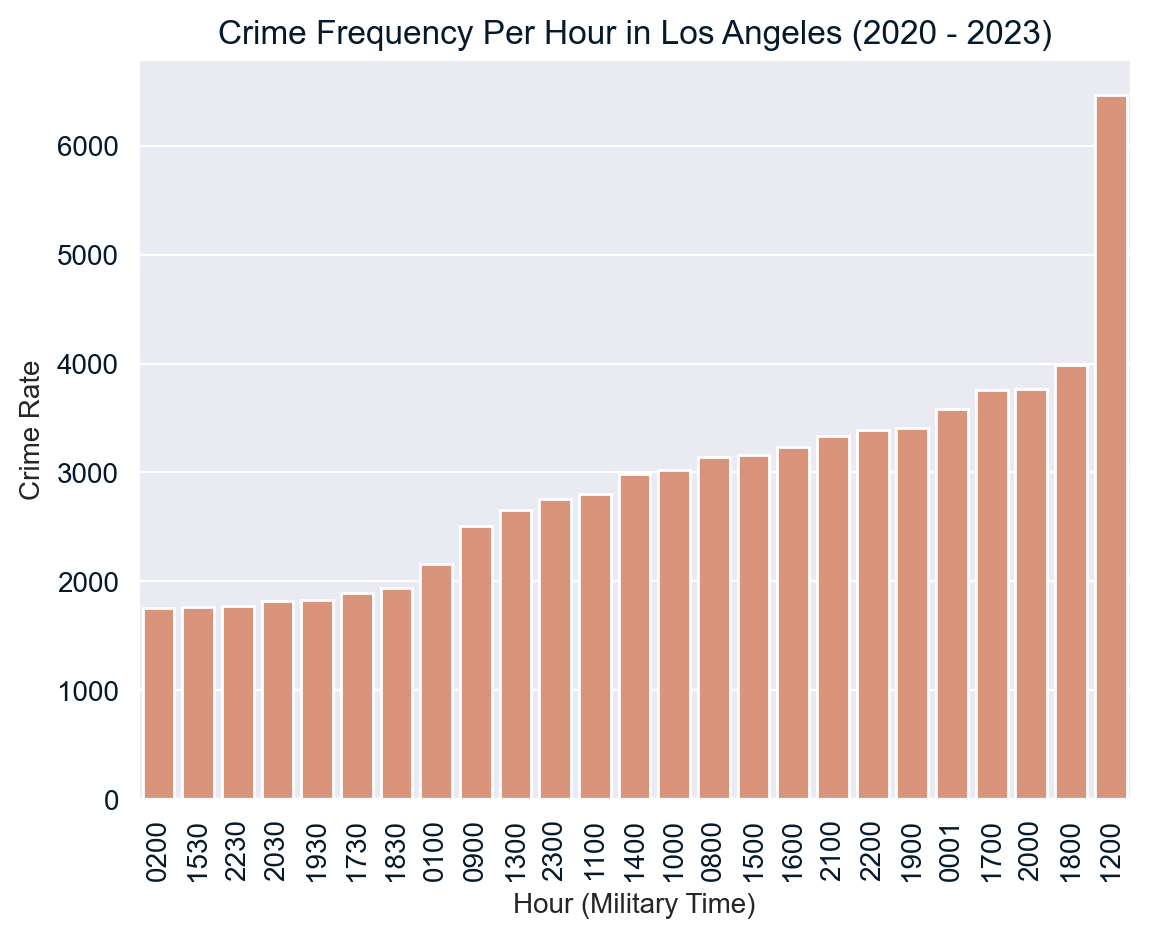

In [23]:
# Confirm the answer
crimes_per_hour = crimes['TIME OCC'].value_counts().reset_index()
plot = sns.barplot(x = 'index',
                   y = 'TIME OCC',
                   data = crimes_per_hour.sort_values(by = 'TIME OCC', ascending = False).head(25))
plot.invert_xaxis()
plot.set_title('Crime Frequency Per Hour in Los Angeles (2020 - 2023)')
plot.set_xlabel('Hour (Military Time)')
plot.set_ylabel('Crime Rate')
plt.xticks(rotation = 90)
plt.show()

---

## Which area has the largest frequency of night crimes?
Night crimes = crimes committed between 10pm and 3:59am

In [24]:
peak_night_crime_location: str

night_crimes = crimes[['AREA NAME', 'TIME OCC']][(crimes['TIME OCC'] >= '2200') | (crimes['TIME OCC'] <= '0359')]
night_crimes_by_area = night_crimes.groupby('AREA NAME')['TIME OCC'].count().reset_index()

peak_night_crime_location = night_crimes_by_area['AREA NAME']\
                                                [night_crimes_by_area['TIME OCC'] == night_crimes_by_area['TIME OCC'].max()].values[0]

print(f'{peak_night_crime_location} is the area with the largest frequency of night crimes.')


Central is the area with the largest frequency of night crimes.


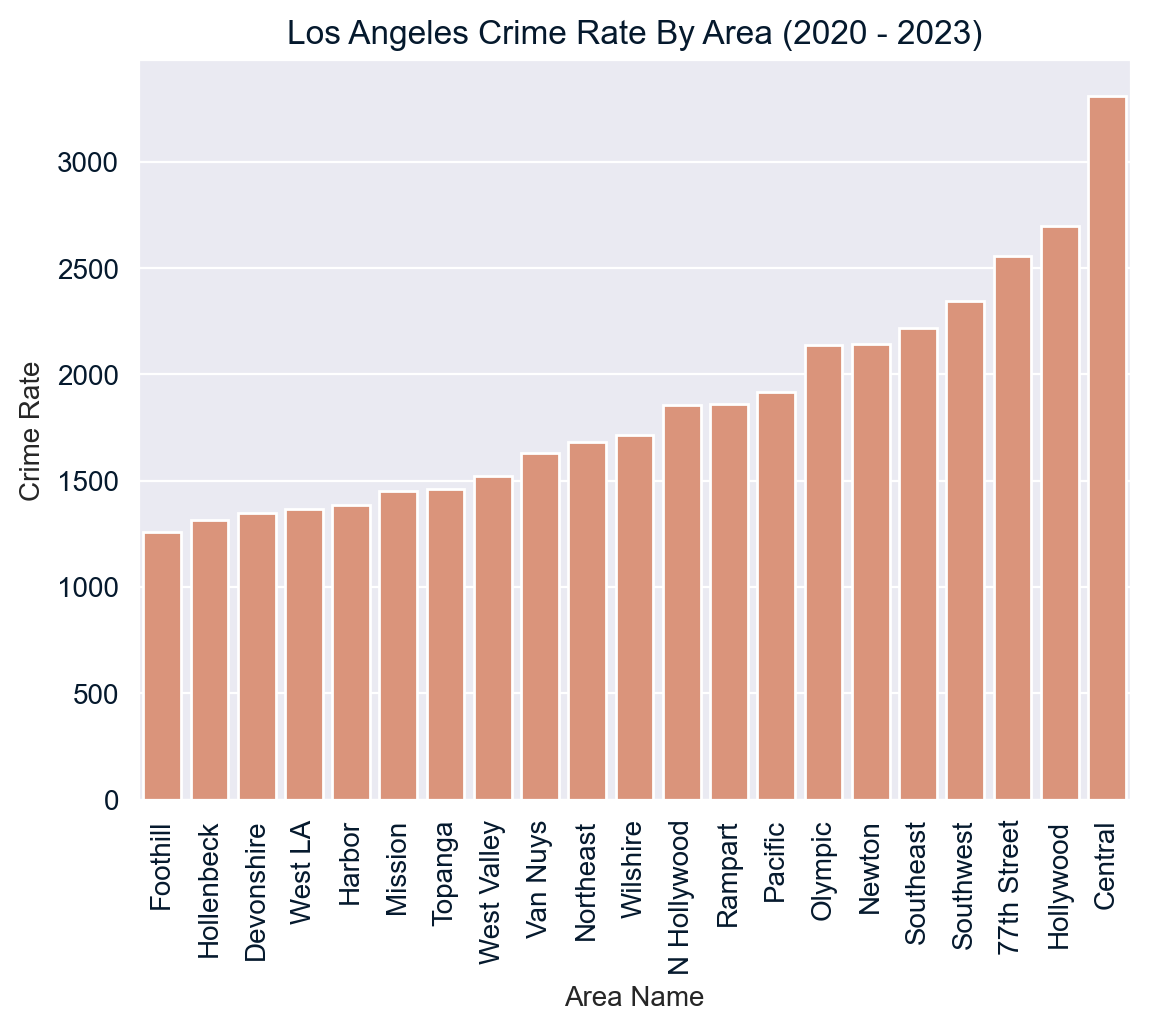

In [25]:
# Confirm the answer
plot = sns.barplot(x = 'AREA NAME',
                   y = 'TIME OCC',
                   data = night_crimes_by_area.sort_values(by = 'TIME OCC'))
plt.xticks(rotation = 90)
plot.set_title('Los Angeles Crime Rate By Area (2020 - 2023)')
plot.set_xlabel('Area Name')
plot.set_ylabel('Crime Rate')
plt.show()

---

## Identify the number of crimes committed against victims of different age groups.
Age group labels:
- 0-17
- 18-25
- 26-34
- 35-44
- 45-54
- 55-64
- 65+

In [26]:
victim_ages: pd.Series

age_group_bins = [0, 17, 25, 34, 44, 54, 64, 150]
age_group_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
victim_ages = pd.cut(crimes['Vict Age'],
                     bins = age_group_bins, 
                     labels = age_group_labels).value_counts()

print(victim_ages)

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Vict Age, dtype: int64


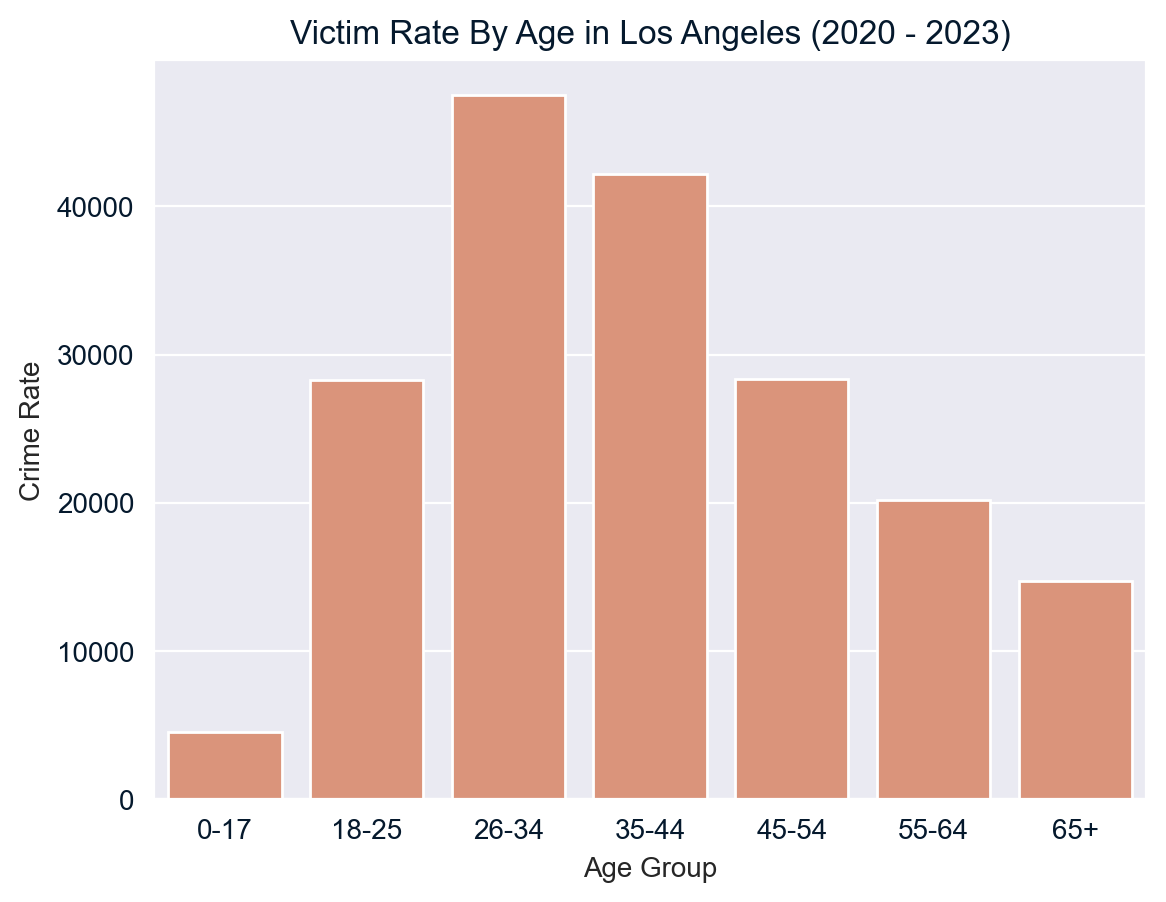

In [27]:
# Confirm the answer
victim_ages_df = victim_ages.reset_index()

plot = sns.barplot(x = 'index',
                   y = 'Vict Age',
                   data = victim_ages_df)
plot.set_title('Victim Rate By Age in Los Angeles (2020 - 2023)')
plot.set_xlabel('Age Group')
plot.set_ylabel('Crime Rate')
plt.show()